## ADVANCED PROJECT: CYLINDER FLOW
This .ipynb contains examples for invocation of the 01_script_cylinder_simulation.py script, that conducts a simulation of the flow around a circular cylinder.
The code is ported from projects MP1, MP2 and Master’s Thesis of M.Bille. Some of the most prominent features implemented are:
- efficient bounce back boundary conditions (Fullway, Halfway, linear Interpolated) for solid bodies, that allow calculation of force on the solid body by Momentum exchange algorithm (MEA)
- simulation-class that allows:
    - boundaries can be called after the streaming step
    - boundaries can use post-collision populations for their bounce back algorithm (needed for HWBB and IBB algorithm)
- observables: coefficient of lift, coefficient of drag
- reporter: profile reporter for average velocity and reynolds stress profiles
- data-processing and -plotting utilities for the measured observables

### Examples
1. 2D Simulation at Re = 200: periodic vortex shedding behind a circular cylinder, calculation of force coefficients (lift, drag) and Strouhal number
2. 3D Simulation at Re = 3900: turbulent vortex shedding behind a circular cylinder, calculation of average velocity and reynolds stress profiles and comparison to literature

### Usage
The example command line calls and parameters below serve as examples for the use of 01_script_cylinder_simulation.py. There are lots of parameters available through arguments (see script itself). The "%run" command is used here, to simulate a bash command line of "python scriptname"

The script will conduct the simulation and write data to an individually named folder in the directory specified for the "--outdir" parameter. This contains plots, .txt files etc.
The output can be controlled through parameters (see script content (argument parser) itself). Plots etc. are named accordingly in the output data directory.

You might want to output 2D or 3D vtk-data for further analysis and visualization. But beware the amount of storage you might need and set your parameters accordingly (see script parameters and code).

### Note
- Some of the functionalities might not work flawlessly through this .ipynb-implementation (warnings etc.): just use a regular python console or similar
- Some functionalities throw a warning, when the flow data con not be processed, because it doesn't meet certain physical characteristics (for example: peak finding in a periodic force coefficient timeseries). This is known and ok.
- The command line output of the script (including useful messages) might not appear in the notebook. This might be because of the "%run" command, see the .txt-output in the output directory for the full log and output, or execute the script in a python console.

### Example 1:
#### 2D Simulation at Re = 200: periodic vortex shedding behind a circular cylinder, calculation of force coefficients (lift, drag) and Strouhal number
NOTE: these default parameters take approx. 2 min to run on an NVIDIA 2060super

Defaults: `01_script_cylinder_simulation.py --outdir "./datafolder" --char_length_lu 20 --t_target 100 --bbbc_type ibb1 --reynolds_number 200 --domain_height_y_in_d 5 --collision bgk --name 2D_simulation_cylinder_Re200 --mach_number 0.1 --stencil D2Q9`

/home/mbille/lettuce_25/lettuce/examples/advanced_projects/efficient_bounce_back_obstacle/01_script_cylinder_simulation.py:619: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


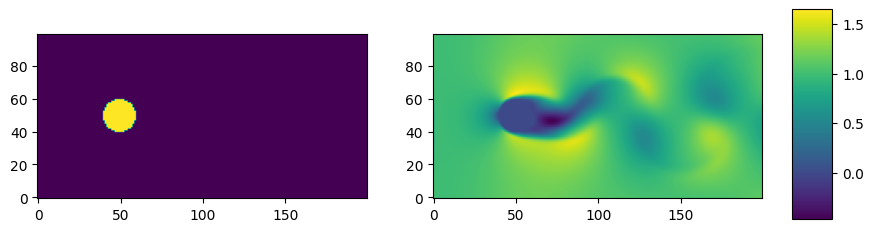

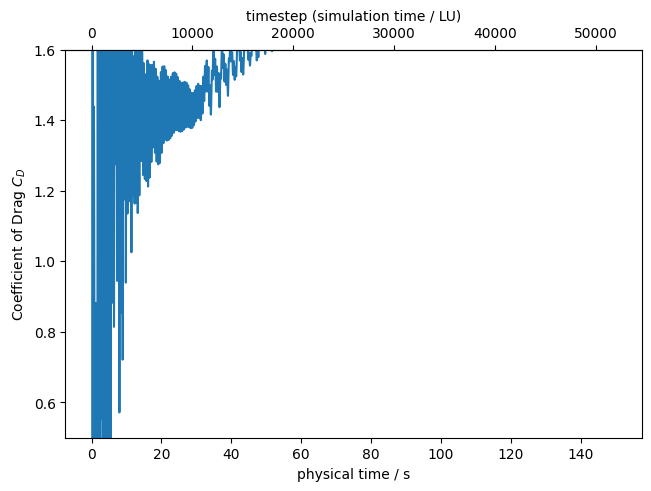

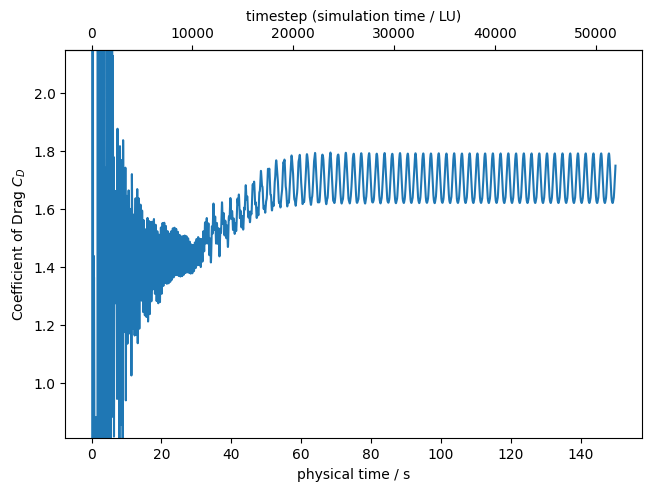

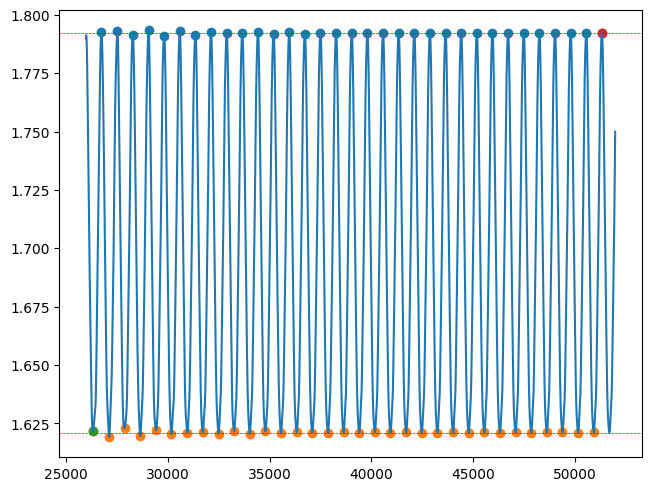

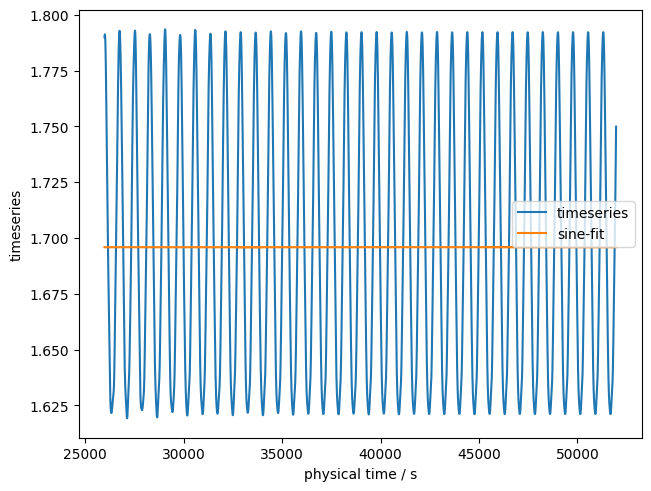

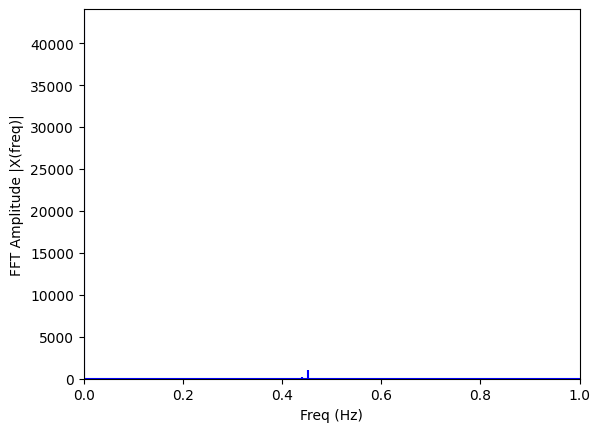

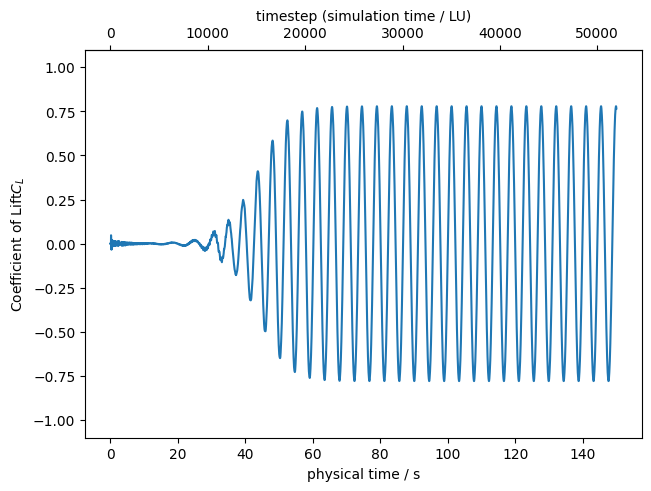

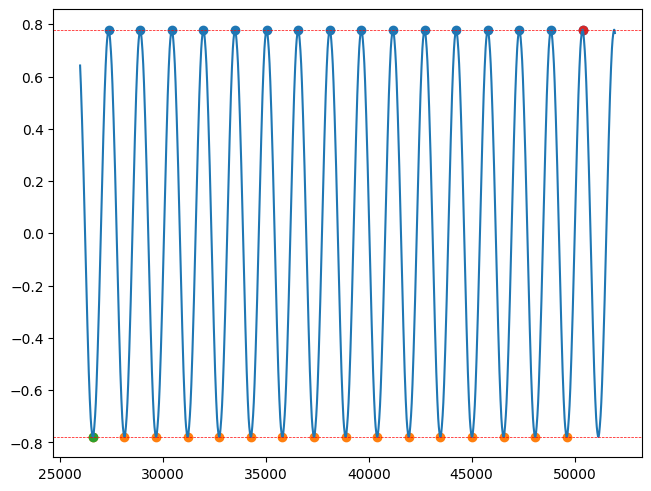

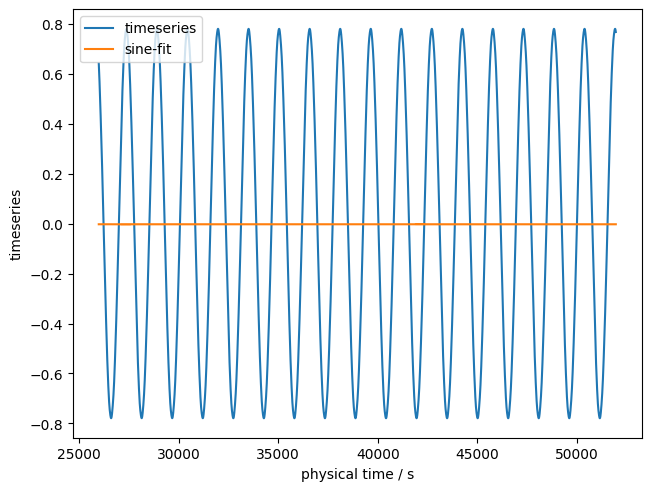

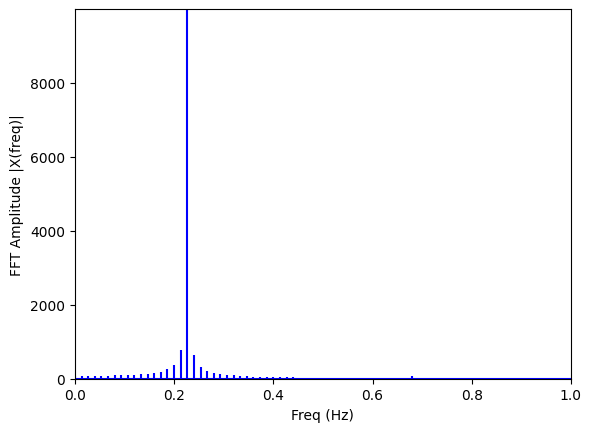

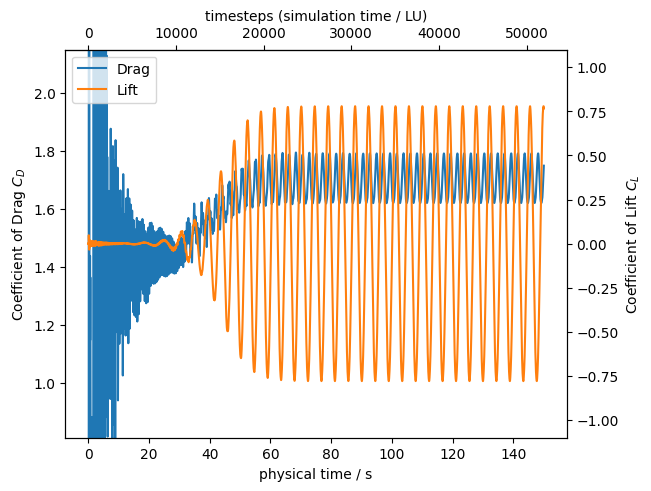

<Figure size 640x480 with 0 Axes>

In [3]:
%matplotlib inline
%run 01_script_cylinder_simulation.py --outdir "./datafolder" --char_length_lu 20 --t_target 100 --bbbc_type ibb1 --reynolds_number 200 --domain_height_y_in_d 5 --collision bgk --name 2D_simulation_cylinder_Re200 --mach_number 0.1 --stencil D2Q9

### Example 2:
#### 3D Simulation at Re = 3900: turbulent vortex shedding behind a circular cylinder, calculation of average velocity and reynolds stress profiles and comparison to literature
Note: This simulation may take very long  (hours) to finish (reasons: 3D stencil, high Reynolds)

In [5]:
%matplotlib inline
%run 01_script_cylinder_simulation.py --outdir "./datafolder" --char_length_lu 20 --t_target 30 --bbbc_type ibb1 --reynolds_number 3900 --domain_height_y_in_d 5 --domain_width_z_in_d 3 --collision kbc --name 3D_simulation_cylinder_Re3900 --mach_number 0.1 --stencil D3Q27 --calc_u_profiles

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>